# **Neural Network V. Multiple Linear Regress (AUTO MPG DATA)**

This data was sourced from the StatLib library and is particular to the specifications of cars. The aim of this data is to emphasize fuel consumption (miles per gallon). It's made up of 7 variables with 398 observations, however, has been slightly modified with 2 of the original instances removed as they had missing values for the “mpg” attribute. This project is to analyse and compare linear multiple regression to neural networks. also, look further to investigate if simple or complex topology or architect has an influence on performance of the model.

In [20]:
## installing packages
install.packages('neuralnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [21]:
#loading packages
library(neuralnet)


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [64]:
#loading in data
data <- read.table("auto-mpg.csv", sep = ",", header = TRUE)
colnames(data)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "model.year"

In [53]:
head(data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,18,8,307,130,3504,12.0,70
2,15,8,350,165,3693,11.5,70
3,18,8,318,150,3436,11.0,70
4,16,8,304,150,3433,12.0,70
5,17,8,302,140,3449,10.5,70
6,15,8,429,198,4341,10.0,70


In [54]:
#checking minimum requirement of at least 398obs. & 7 variables
str(data)

'data.frame':	398 obs. of  7 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...


In [57]:
#cleaning data to remove non-numeric variables, NAs & easily readble col names
sum(is.na(data))
data <- data[rowSums(is.na(data)) == 0, ]

[1] 0

In [58]:
summary(data) # statistical description


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.38   1st Qu.:4.000   1st Qu.:104.8   1st Qu.: 75.0   1st Qu.:2225  
 Median :23.00   Median :4.000   Median :148.5   Median : 92.0   Median :2804  
 Mean   :23.52   Mean   :5.457   Mean   :193.7   Mean   :104.2   Mean   :2973  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:263.2   3rd Qu.:125.0   3rd Qu.:3610  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration     model.year   
 Min.   : 8.00   Min.   :70.00  
 1st Qu.:13.80   1st Qu.:73.00  
 Median :15.50   Median :76.00  
 Mean   :15.56   Mean   :76.03  
 3rd Qu.:17.12   3rd Qu.:79.00  
 Max.   :24.80   Max.   :82.00  

# **Building Neural Networks**

In [59]:
# custom normalization function
normalize <- function(x) { return((x - min(x)) / (max(x) - min(x)))}


In [60]:
# apply normalization to entire data frame
data_norm <- as.data.frame(lapply(data, normalize))


In [61]:
# confirm that the range
summary(data_norm$mpg)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2227  0.3723  0.3861  0.5319  1.0000 

In [62]:
# compared to the original minimum and maximum
summary(data$mpg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   17.38   23.00   23.52   29.00   46.60 

In [14]:
# spliting data into training and test data
data_train <- data_norm[1:277, ]
data_test <- data_norm[273:396, ]


In [15]:
# creating training and test data with random observations
ind_train <- sample(1:dim(data_norm)[1], size = 277)
data_train <- data_norm[ind_train, ]
data_test <- data_norm[-ind_train, ]


In [22]:
# #train the neuralnet model
# simple ANN with only a single hidden layer and a neuron
set.seed(12345) # in order to reproduce results
data_model <- neuralnet(formula = mpg ~ cylinders + displacement +
                          horsepower +  weight + acceleration +
                          model.year, data = data_train)

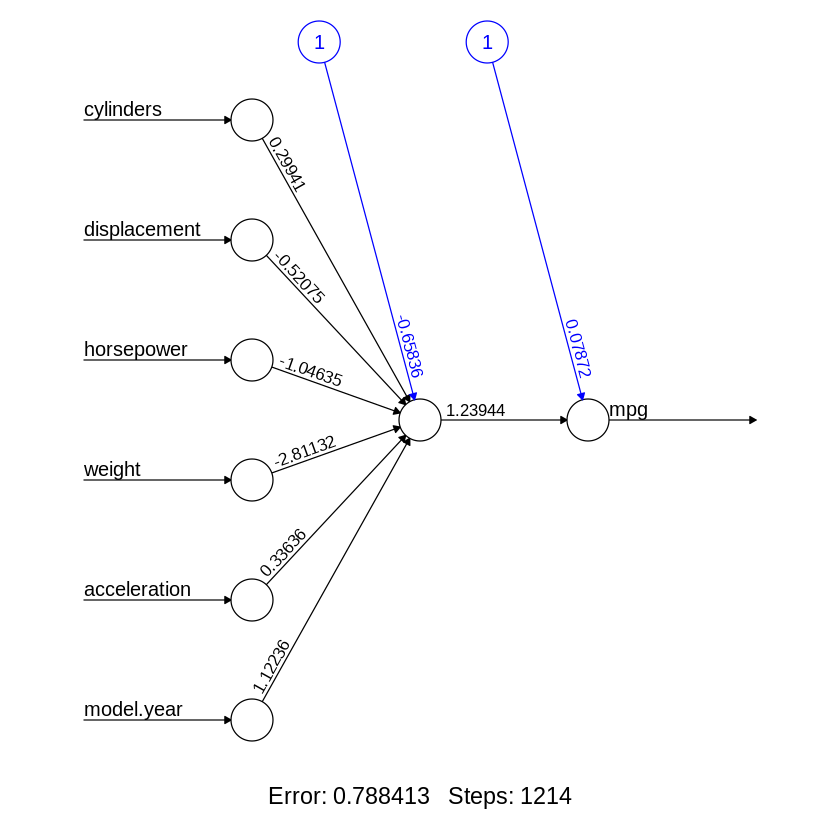

In [23]:
# visualize the network topology
plot(data_model, rep = "best")

In [24]:
# obtain model results
model_results <- compute(data_model, data_test[2:7])


In [25]:
# obtain predicted mpg values
predicted_mpg<- model_results$net.result


In [26]:
# examine the correlation between predicted and actual values
COR.model <- cor(predicted_mpg, data_test$mpg)
COR.model

0.9369334


In [27]:
# testing MSE errors
MSE.model= mean((predicted_mpg - data_test$mpg)^2)
MSE.model

[1] 0.005247779

# **Improving and evaluating the model performance**

In [28]:
# more complex neural network topology with 6 hidden neurons
set.seed(12345) # in order to reproduce results
data_model2 <-neuralnet(formula = mpg ~ cylinders + displacement +
                          horsepower +  weight + acceleration +
                          model.year, data = data_train, hidden = 6)

In [29]:
# evaluating the results
model_results2 <- compute(data_model2, data_test[2:7])
predicted_mpg2 <- model_results2$net.result
COR.model2 <- cor(predicted_mpg2, data_test$mpg)
COR.model2

0.9399224


In [30]:
# testing MSE errors
MSE.model2= mean((predicted_mpg2 - data_test$mpg)^2)
MSE.model2

[1] 0.005040278

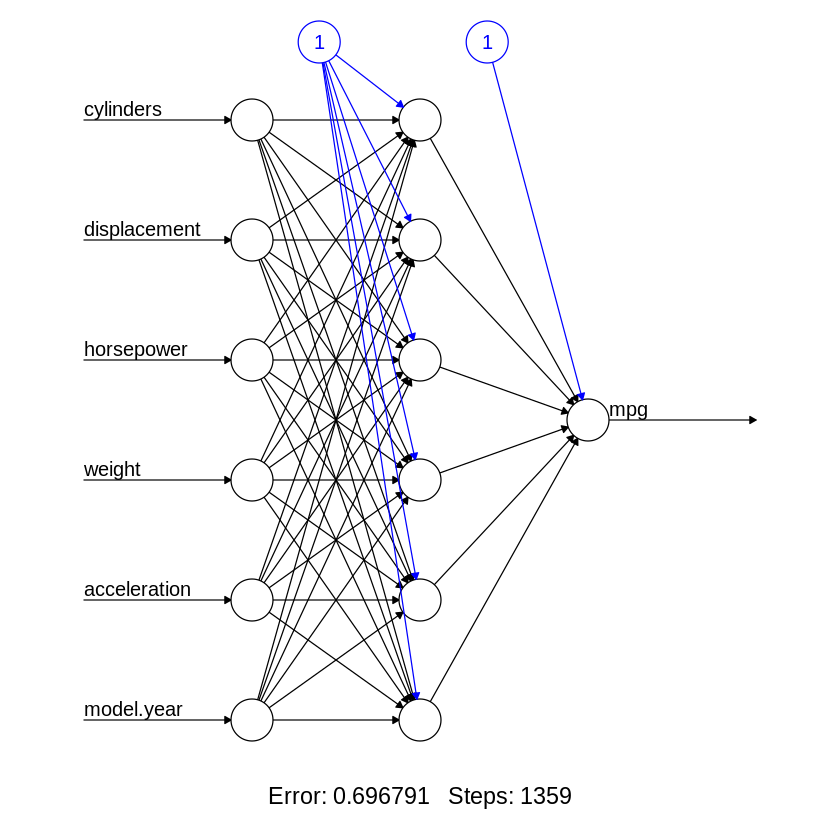

In [31]:
# plotting the network
plot(data_model2, information = T, show.weights = F, rep = "best")

A simple and basic neural network was built with a default setting (one hidden layer and a neuron) with a correlation of about 0.9337038, which shows a strong relationship between the actual and predicted values and an MSE of 0.006057862. which suggests that the model works well on this data. However, the model was improved upon by building a more complex neural network with one hidden layer and six neurons. This is evident with the slight increase in correlation to 0.9342003 and drops in MSE to 0.005942293, indicating the complex model (one hidden layer, six neurons) performs well compared to the single hidden and a neuron. The single hidden layer with six neurons, therefore, has a strong relationship between predicted and actual values with the least returns in errors (MSE). The model itself shows a drop in error from 0.755617 to 0.640529 .

## ** further Improvement in model performance.**

In [34]:
# an even more complex neural network topology with 2 hidden layers and 5 and 3 hidden neurons, respectively
set.seed(12345)
data_model3 <- neuralnet(formula = mpg ~ cylinders + displacement +
                           horsepower +  weight + acceleration +
                           model.year, data = data_train, hidden = c(5, 3))

In [35]:
# evaluate the results
model_results3 <- compute(data_model3, data_test[2:7])
predicted_mpg3 <- model_results3$net.result
COR.model3 <- cor(predicted_mpg3, data_test$mpg)
COR.model3

0.9486835


In [36]:
# testing MSE errors
MSE.model3= mean((predicted_mpg3 - data_test$mpg)^2)
MSE.model3

[1] 0.004358324

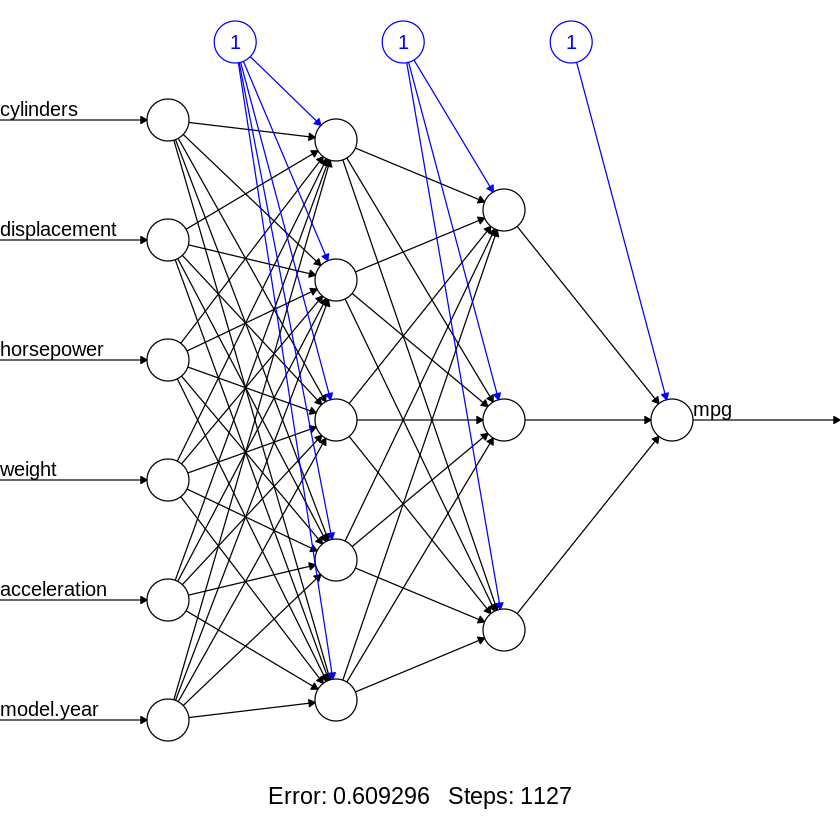

In [37]:
# plotting the network
plot(data_model3, information = T, show.weights = F, rep = "best")

This model is much more complex than the initial two. it has two hidden layers with five and three neurons on each layer, respectively. It has a better correlation of 0.9380635 with an MSE of 0.005779198. It also had the least error in the actual model of 0.583542. the two hidden layers with 5 and 3 neurons are the best among the three models.

# **multiple linear regression**

In [39]:
set.seed(12345)
data_modelO <- lm(formula = mpg ~ cylinders + displacement +
                    horsepower +  weight + acceleration +
                    model.year, data = data_train)
summary(data_modelO)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + model.year, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22515 -0.06404  0.00169  0.05346  0.37630 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.45806    0.03756  12.197  < 2e-16 ***
cylinders    -0.07619    0.05406  -1.409   0.1598    
displacement  0.17757    0.09431   1.883   0.0608 .  
horsepower    0.03193    0.08329   0.383   0.7018    
weight       -0.70448    0.08098  -8.699 3.34e-16 ***
acceleration  0.12873    0.05709   2.255   0.0249 *  
model.year    0.23128    0.02025  11.423  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09304 on 270 degrees of freedom
Multiple R-squared:  0.8073,	Adjusted R-squared:  0.803 
F-statistic: 188.5 on 6 and 270 DF,  p-value: < 2.2e-16


In [40]:
# test the fitted model
model_resultsO <- as.numeric(data_modelO$coefficients[2:7] %*% t(data_test[,2:7]) +
                               data_modelO$coefficients[1])
COR.modelO <- cor(model_resultsO, data_test$mpg)
COR.modelO

[1] 0.8969745

In [41]:
# testing MSE errors
MSE.modelO= mean((model_resultsO - data_test$mpg)^2)
MSE.modelO

[1] 0.008434241

#** Evaluation and Comparison of Models**

In [45]:
### Saving all MSE results in a data frame
MSE.all = data.frame(cbind(MSE.model, MSE.model2, MSE.model3, MSE.modelO),
                     row.names = "MSE")
# layer to neuron ratio (layer : neuron) representing col names
colnames(MSE.all) = c("1:1", "1:6", "2:5:3", "lm")
MSE.all

,1:1,1:6,2:5:3,lm
,<dbl>,<dbl>,<dbl>,<dbl>
MSE,0.005247779,0.005040278,0.004358324,0.008434241


In [46]:
### Saving all correlation results in a data frame
COR.all = data.frame(cbind(COR.model, COR.model2, COR.model3, COR.modelO),
                     row.names = "COR")
# layer to neuron ratio (layer : neuron) representing col names
colnames(COR.all) = c("1:1", "1:6", "2:5:3", "lm")
COR.all

,1:1,1:6,2:5:3,lm
,<dbl>,<dbl>,<dbl>,<dbl>
COR,0.9369334,0.9399224,0.9486835,0.8969745


As already discussed, the correlation and MSE are slightly close to each as the predictor variables have a strong relationship to the target variable. However, the multiple linear regression has to be regretted on sight since it has the lowest correlation (0.9085677) and highest MSE (0.008156805) and is not approximately close to the other models. The two hidden layers with 5 and 3 neurons, respectively, are the best among all the models established so far.

# **complete 10x10 correlation matrix of networks**

In [47]:
##  fitting n1*n2 models and calculate the test statistics
set.seed(12345)
n1=10
n2=10
Cor.mat.in = Cor.mat.out = matrix(0, n1, n2) # create a n1*n2 matrix
for(i in 1:n1){
  for(j in 1:n2){
    Modelij <- neuralnet(formula = mpg ~ cylinders + displacement +
                           horsepower +  weight + acceleration +
                           model.year, data = data_train, hidden = c(i, j))
    #compute the "MPG" from the training set
    results.in <- compute(Modelij, data_train[2:7])
    predicted.in <- results.in$net.result
    # evaluate the results
    Cor.mat.in[i, j] <- cor(predicted.in, data_train$mpg)
    #compute the "MPG" from the training set
    results.out <- compute(Modelij, data_test[2:7])
    predicted.out <- results.out$net.result
    # evaluate the results
    Cor.mat.out[i, j]=cor(predicted.out, data_test$mpg)
  }
}
Cor.mat.out

0.9366903,0.9363815,0.9366093,0.9366266,0.9364829,0.9370314,0.9337495,0.9366848,0.9371768,0.9368125
0.9372723,0.9393547,0.9370668,0.9362788,0.9428223,0.9396960,0.9401928,0.9371738,0.9381719,0.9370471
0.9387291,0.9369569,0.9367506,0.9413016,0.9378846,0.9405217,0.9377127,0.9411546,0.9451086,0.9443387
0.9454854,0.9439040,0.9344761,0.9444834,0.9120099,0.9475178,0.9432588,0.9447256,0.9445478,0.9446073
0.8661683,0.9411590,0.9487516,0.9476039,0.9481017,0.9278744,0.9437307,0.9468751,0.9294915,0.9404509
0.9478458,0.9409090,0.9443301,0.9443928,0.9461663,0.9419999,0.9422459,0.9423869,0.9460714,0.9447320
0.9415342,0.9365122,0.9475213,0.9411989,0.9426998,0.9457391,0.9450498,0.9337863,0.8958610,0.9466824
0.9416029,0.9341799,0.9467094,0.9228092,0.9408205,0.9473014,0.9315938,0.9278585,0.9335312,0.9434823
0.9393261,0.9301674,0.9395281,0.9410781,0.9453347,0.9406741,0.9382973,0.9394592,0.9398273,0.9234940
0.9430255,0.9377336,0.9418941,0.9224417,0.9440468,0.9061348,0.9127773,0.8829642,0.9284142,0.8778875


In [48]:
max(Cor.mat.in)

[1] 0.989514

In [49]:
#show the location of the largest cor. in the matrix
which(Cor.mat.in == max(Cor.mat.in), arr.ind = TRUE)

row,col
10,10


In [50]:
max(Cor.mat.out)

[1] 0.9487516

In [51]:
#show the location of the largest cor. in the matrix
which(Cor.mat.out == max(Cor.mat.out), arr.ind = TRUE)

row,col
5,3


A 10 X 10 correlation matrix is created by fitting the 100 NN models with two hidden layers hosting a number of neurons on each layer ranging from 1 to 100 on the training data to find out the best fit among the possible 100 models. The matrix Table shows that a neuron on each hidden layer correlates with 0.9339111. with the assistance of the Cor.mat.out function, it can easily be noticed that the best model is 0.9438043, slightly better than our initial best fit of 2 hidden layers with 5 and 3 neurons (0.9380635), respectively, and is on the 6th row and 6th column. This means the best model has six neurons on the first hidden layer and six on the second.